<a href="https://colab.research.google.com/github/AndrewRucker/Fantasy-Football-Betting-Projects/blob/main/BestBall/Best_Ball_ADP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

In [6]:
#Read in CSV to dataframe
url_ADP2021 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2021ADP.csv'

ADP_2021 = pd.read_csv(url_ADP2021, index_col='ID')

ADP_2021

,RK,NAME,AGE,POS,POS RK,ADP
ID,,,,,,
18877,1,Christian McCaffrey,25.0,RB,RB1,1.3
18872,2,Dalvin Cook,26.0,RB,RB2,2.5
18878,3,Alvin Kamara,26.0,RB,RB3,3.1
16470,4,Davante Adams,29.0,WR,WR1,4.5
17923,5,Ezekiel Elliott,26.0,RB,RB4,5.3
...,...,...,...,...,...,...
20013,296,Cedrick Wilson,26.0,WR,WR137,278.0
21804,297,DeeJay Dallas,23.0,RB,RB78,279.0
20835,298,KeeSean Johnson,25.0,WR,WR138,280.0


In [7]:

#Read in CSV to dataframe
url_PPGOR2021 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2021PPGOR.csv'


PPGOR_2021 = pd.read_csv(url_PPGOR2021, index_col='ID')



PPGOR_2021 = PPGOR_2021.dropna(how='all', axis='columns')

df_2021 = pd.merge(PPGOR_2021, ADP_2021, on="ID", how="right")

df_2021 = df_2021.drop('RK',1)
df_2021 = df_2021.drop('NAME_y',1)
df_2021 = df_2021.drop('POS_y',1)
df_2021 = df_2021.drop('POS RK',1)
df_2021 = df_2021.dropna(how='all', axis='columns')
df_2021 = df_2021[df_2021['NAME_x'].notna()]

df_2021.columns = ['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP']


df_2021 = df_2021[df_2021.POS != 'DST']
df_2021 = df_2021[df_2021.POS != 'K']

df_2021.sort_values(by=['PPGOR'], ascending = False)
df_2021 = df_2021.where(df_2021.PPGOR > 2)
df_2021 = df_2021[df_2021['NAME'].notna()]
df_2021

round_conditions = [
                    (df_2021['ADP'] <= 11),
                    (df_2021['ADP'] <= 22) & (df_2021['ADP'] > 11),
                    (df_2021['ADP'] <= 33) & (df_2021['ADP'] > 22),
                    (df_2021['ADP'] <= 44) & (df_2021['ADP'] > 33),
                    (df_2021['ADP'] <= 55) & (df_2021['ADP'] > 44),
                    (df_2021['ADP'] <= 66) & (df_2021['ADP'] > 55),
                    (df_2021['ADP'] <= 77) & (df_2021['ADP'] > 66),
                    (df_2021['ADP'] <= 88) & (df_2021['ADP'] > 77),
                    (df_2021['ADP'] <= 99) & (df_2021['ADP'] > 88),
                    (df_2021['ADP'] <= 110) & (df_2021['ADP'] > 99),
                    (df_2021['ADP'] <= 121) & (df_2021['ADP'] > 110),
                    (df_2021['ADP'] <= 132) & (df_2021['ADP'] > 121),
                    (df_2021['ADP'] <= 143) & (df_2021['ADP'] > 132),
                    (df_2021['ADP'] <= 154) & (df_2021['ADP'] > 143),
                    (df_2021['ADP'] <= 165) & (df_2021['ADP'] > 154),
                    (df_2021['ADP'] <= 176) & (df_2021['ADP'] > 165),
                    (df_2021['ADP'] >= 177)
]

round_values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17+']

df_2021['Round'] = np.select(round_conditions, round_values)

df_2021['Year'] = '2021'

df_2021



,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
ID,,,,,,,,,
18877,Christian McCaffrey,RB,18.2,127.50,3.650000,25.0,1.3,1,2021
18872,Dalvin Cook,RB,16.9,220.30,2.350000,26.0,2.5,1,2021
18878,Alvin Kamara,RB,19.0,246.70,4.450000,26.0,3.1,1,2021
16470,Davante Adams,WR,23.0,368.30,8.802041,29.0,4.5,1,2021
17959,Derrick Henry,RB,26.0,208.30,11.450000,28.0,6.4,1,2021
19562,Austin Ekeler,RB,21.9,349.80,7.350000,26.0,6.5,1,2021
15048,Travis Kelce,TE,17.2,275.80,5.006667,32.0,6.9,1,2021
18082,Tyreek Hill,WR,18.0,306.50,3.802041,27.0,9.3,1,2021
21768,Najee Harris,RB,18.4,312.70,3.850000,23.0,11.6,2,2021


In [8]:
url_ADP2020 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2020ADP.csv'

ADP_2020 = pd.read_csv(url_ADP2020, index_col='ID')

url_PPGOR2020 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2020PPGOR.csv'

PPGOR_2020 = pd.read_csv(url_PPGOR2020, index_col='ID')

PPGOR_2020 = PPGOR_2020.dropna(how='all', axis='columns')

df_2020 = pd.merge(PPGOR_2020, ADP_2020, on="ID", how="right")

#df_2020 = df_2020.drop('RK',1)
#df_2020 = df_2020.drop('NAME_y',1)
#df_2020 = df_2020.drop('POS_y',1)
#df_2020 = df_2020.drop('POS RK',1)
df_2020 = df_2020.dropna(how='all', axis='columns')
#df_2020 = df_2020[df_2020['NAME_x'].notna()]

df_2020.columns = ['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP']


df_2020 = df_2020[df_2020.POS != 'DST']
df_2020 = df_2020[df_2020.POS != 'K']

df_2020.sort_values(by=['PPGOR'], ascending = False)
df_2020 = df_2020.where(df_2020.PPGOR > 2)
df_2020 = df_2020[df_2020['NAME'].notna()]
df_2020

round_conditions = [
                    (df_2020['ADP'] <= 11),
                    (df_2020['ADP'] <= 22) & (df_2020['ADP'] > 11),
                    (df_2020['ADP'] <= 33) & (df_2020['ADP'] > 22),
                    (df_2020['ADP'] <= 44) & (df_2020['ADP'] > 33),
                    (df_2020['ADP'] <= 55) & (df_2020['ADP'] > 44),
                    (df_2020['ADP'] <= 66) & (df_2020['ADP'] > 55),
                    (df_2020['ADP'] <= 77) & (df_2020['ADP'] > 66),
                    (df_2020['ADP'] <= 88) & (df_2020['ADP'] > 77),
                    (df_2020['ADP'] <= 99) & (df_2020['ADP'] > 88),
                    (df_2020['ADP'] <= 110) & (df_2020['ADP'] > 99),
                    (df_2020['ADP'] <= 121) & (df_2020['ADP'] > 110),
                    (df_2020['ADP'] <= 132) & (df_2020['ADP'] > 121),
                    (df_2020['ADP'] <= 143) & (df_2020['ADP'] > 132),
                    (df_2020['ADP'] <= 154) & (df_2020['ADP'] > 143),
                    (df_2020['ADP'] <= 165) & (df_2020['ADP'] > 154),
                    (df_2020['ADP'] <= 176) & (df_2020['ADP'] > 165),
                    (df_2020['ADP'] >= 177)
]

round_values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17+']

df_2020['Round'] = np.select(round_conditions, round_values)

df_2020['Year'] = '2020'

df_2020




,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
ID,,,,,,,,,
18877,Christian McCaffrey,RB,30.1,90.40,15.494595,25.0,1.2,1,2020
18878,Alvin Kamara,RB,25.6,383.80,10.994595,26.0,4.9,1,2020
18872,Dalvin Cook,RB,26.1,364.80,11.494595,26.0,6.2,1,2020
17959,Derrick Henry,RB,22.8,365.10,8.194595,28.0,7.4,1,2020
16470,Davante Adams,WR,27.2,380.40,13.118033,29.0,10.4,1,2020
18858,Joe Mixon,RB,17.3,103.60,2.694595,25.0,13.1,2,2020
13291,Julio Jones,WR,17.2,155.10,3.118033,32.0,14.4,2,2020
18082,Tyreek Hill,WR,22.5,337.90,8.418033,27.0,15.8,2,2020
19798,Nick Chubb,RB,18.9,226.70,4.294595,26.0,16.3,2,2020


In [9]:
Master_df = pd.concat([df_2020, df_2021])

Master_df

,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
ID,,,,,,,,,
18877,Christian McCaffrey,RB,30.1,90.40,15.494595,25.0,1.2,1,2020
18878,Alvin Kamara,RB,25.6,383.80,10.994595,26.0,4.9,1,2020
18872,Dalvin Cook,RB,26.1,364.80,11.494595,26.0,6.2,1,2020
17959,Derrick Henry,RB,22.8,365.10,8.194595,28.0,7.4,1,2020
16470,Davante Adams,WR,27.2,380.40,13.118033,29.0,10.4,1,2020
...,...,...,...,...,...,...,...,...,...
21831,Jalen Hurts,QB,21.9,329.16,2.012500,23.0,94.8,9,2021
18983,James Conner,RB,17.2,257.70,2.650000,26.0,97.9,9,2021
18803,Leonard Fournette,RB,18.7,261.60,4.150000,27.0,98.9,9,2021


In [11]:
url_ADP2019 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2019ADP.csv'

ADP_2019 = pd.read_csv(url_ADP2019, index_col='ID')

url_PPGOR2019 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2019PPGOR.csv'

PPGOR_2019 = pd.read_csv(url_PPGOR2019, index_col='ID')

PPGOR_2019 = PPGOR_2019.dropna(how='all', axis='columns')

df_2019 = pd.merge(PPGOR_2019, ADP_2019, on="ID", how="right")


df_2019 = df_2019.dropna(how='all', axis='columns')


df_2019.columns = ['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP']


df_2019 = df_2019[df_2019.POS != 'DST']
df_2019 = df_2019[df_2019.POS != 'K']

df_2019.sort_values(by=['PPGOR'], ascending = False)
df_2019 = df_2019.where(df_2019.PPGOR > 2)
df_2019 = df_2019[df_2019['NAME'].notna()]
df_2019

round_conditions = [
                    (df_2019['ADP'] <= 11),
                    (df_2019['ADP'] <= 22) & (df_2019['ADP'] > 11),
                    (df_2019['ADP'] <= 33) & (df_2019['ADP'] > 22),
                    (df_2019['ADP'] <= 44) & (df_2019['ADP'] > 33),
                    (df_2019['ADP'] <= 55) & (df_2019['ADP'] > 44),
                    (df_2019['ADP'] <= 66) & (df_2019['ADP'] > 55),
                    (df_2019['ADP'] <= 77) & (df_2019['ADP'] > 66),
                    (df_2019['ADP'] <= 88) & (df_2019['ADP'] > 77),
                    (df_2019['ADP'] <= 99) & (df_2019['ADP'] > 88),
                    (df_2019['ADP'] <= 110) & (df_2019['ADP'] > 99),
                    (df_2019['ADP'] <= 121) & (df_2019['ADP'] > 110),
                    (df_2019['ADP'] <= 132) & (df_2019['ADP'] > 121),
                    (df_2019['ADP'] <= 143) & (df_2019['ADP'] > 132),
                    (df_2019['ADP'] <= 154) & (df_2019['ADP'] > 143),
                    (df_2019['ADP'] <= 165) & (df_2019['ADP'] > 154),
                    (df_2019['ADP'] <= 176) & (df_2019['ADP'] > 165),
                    (df_2019['ADP'] >= 177)
]

round_values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17+']

df_2019['Round'] = np.select(round_conditions, round_values)

df_2019['Year'] = '2019'

Master_df = pd.concat([df_2020, df_2021, df_2019])

Master_df




,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
ID,,,,,,,,,
18877,Christian McCaffrey,RB,30.1,90.40,15.494595,25.0,1.2,1,2020
18878,Alvin Kamara,RB,25.6,383.80,10.994595,26.0,4.9,1,2020
18872,Dalvin Cook,RB,26.1,364.80,11.494595,26.0,6.2,1,2020
17959,Derrick Henry,RB,22.8,365.10,8.194595,28.0,7.4,1,2020
16470,Davante Adams,WR,27.2,380.40,13.118033,29.0,10.4,1,2020
...,...,...,...,...,...,...,...,...,...
19803,Mark Andrews,TE,14.3,214.20,2.042857,26.0,142.1,13,2019
16964,Darren Waller,TE,14.8,237.00,2.542857,29.0,155.8,15,2019
9038,Matthew Stafford,QB,23.3,186.56,3.329630,33.0,160.8,15,2019


In [12]:
url_ADP2018 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2018ADP.csv'

ADP_2018 = pd.read_csv(url_ADP2018, index_col='ID')

url_PPGOR2018 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2018PPGOR.csv'

PPGOR_2018 = pd.read_csv(url_PPGOR2018, index_col='ID')

PPGOR_2018 = PPGOR_2018.dropna(how='all', axis='columns')

df_2018 = pd.merge(PPGOR_2018, ADP_2018, on="ID", how="right")


df_2018 = df_2018.dropna(how='all', axis='columns')


df_2018.columns = ['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP']


df_2018 = df_2018[df_2018.POS != 'DST']
df_2018 = df_2018[df_2018.POS != 'K']

df_2018.sort_values(by=['PPGOR'], ascending = False)
df_2018 = df_2018.where(df_2018.PPGOR > 2)
df_2018 = df_2018[df_2018['NAME'].notna()]
df_2018

round_conditions = [
                    (df_2018['ADP'] <= 11),
                    (df_2018['ADP'] <= 22) & (df_2018['ADP'] > 11),
                    (df_2018['ADP'] <= 33) & (df_2018['ADP'] > 22),
                    (df_2018['ADP'] <= 44) & (df_2018['ADP'] > 33),
                    (df_2018['ADP'] <= 55) & (df_2018['ADP'] > 44),
                    (df_2018['ADP'] <= 66) & (df_2018['ADP'] > 55),
                    (df_2018['ADP'] <= 77) & (df_2018['ADP'] > 66),
                    (df_2018['ADP'] <= 88) & (df_2018['ADP'] > 77),
                    (df_2018['ADP'] <= 99) & (df_2018['ADP'] > 88),
                    (df_2018['ADP'] <= 110) & (df_2018['ADP'] > 99),
                    (df_2018['ADP'] <= 121) & (df_2018['ADP'] > 110),
                    (df_2018['ADP'] <= 132) & (df_2018['ADP'] > 121),
                    (df_2018['ADP'] <= 143) & (df_2018['ADP'] > 132),
                    (df_2018['ADP'] <= 154) & (df_2018['ADP'] > 143),
                    (df_2018['ADP'] <= 165) & (df_2018['ADP'] > 154),
                    (df_2018['ADP'] <= 176) & (df_2018['ADP'] > 165),
                    (df_2018['ADP'] >= 177)
]

round_values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17+']

df_2018['Round'] = np.select(round_conditions, round_values)

df_2018['Year'] = '2018'

Master_df = pd.concat([df_2020, df_2021, df_2019, df_2018])

Master_df



,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
ID,,,,,,,,,
18877,Christian McCaffrey,RB,30.1,90.40,15.494595,25.0,1.2,1,2020
18878,Alvin Kamara,RB,25.6,383.80,10.994595,26.0,4.9,1,2020
18872,Dalvin Cook,RB,26.1,364.80,11.494595,26.0,6.2,1,2020
17959,Derrick Henry,RB,22.8,365.10,8.194595,28.0,7.4,1,2020
16470,Davante Adams,WR,27.2,380.40,13.118033,29.0,10.4,1,2020
...,...,...,...,...,...,...,...,...,...
732,Matt Ryan,QB,24.4,390.96,2.288000,36.0,108.8,10,2018
18890,Patrick Mahomes,QB,28.8,461.08,6.688000,26.0,119.0,11,2018
19063,George Kittle,TE,16.9,270.70,4.842857,28.0,132.4,13,2018


In [13]:
url_ADP2017 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2017ADP.csv'

ADP_2017 = pd.read_csv(url_ADP2017, index_col='ID')

url_PPGOR2017 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2017PPGOR.csv'

PPGOR_2017 = pd.read_csv(url_PPGOR2017, index_col='ID')

PPGOR_2017 = PPGOR_2017.dropna(how='all', axis='columns')

df_2017 = pd.merge(PPGOR_2017, ADP_2017, on="ID", how="right")


df_2017 = df_2017.dropna(how='all', axis='columns')


df_2017.columns = ['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP']


df_2017 = df_2017[df_2017.POS != 'DST']
df_2017 = df_2017[df_2017.POS != 'K']

df_2017.sort_values(by=['PPGOR'], ascending = False)
df_2017 = df_2017.where(df_2017.PPGOR > 2)
df_2017 = df_2017[df_2017['NAME'].notna()]
df_2017

round_conditions = [
                    (df_2017['ADP'] <= 11),
                    (df_2017['ADP'] <= 22) & (df_2017['ADP'] > 11),
                    (df_2017['ADP'] <= 33) & (df_2017['ADP'] > 22),
                    (df_2017['ADP'] <= 44) & (df_2017['ADP'] > 33),
                    (df_2017['ADP'] <= 55) & (df_2017['ADP'] > 44),
                    (df_2017['ADP'] <= 66) & (df_2017['ADP'] > 55),
                    (df_2017['ADP'] <= 77) & (df_2017['ADP'] > 66),
                    (df_2017['ADP'] <= 88) & (df_2017['ADP'] > 77),
                    (df_2017['ADP'] <= 99) & (df_2017['ADP'] > 88),
                    (df_2017['ADP'] <= 110) & (df_2017['ADP'] > 99),
                    (df_2017['ADP'] <= 121) & (df_2017['ADP'] > 110),
                    (df_2017['ADP'] <= 132) & (df_2017['ADP'] > 121),
                    (df_2017['ADP'] <= 143) & (df_2017['ADP'] > 132),
                    (df_2017['ADP'] <= 154) & (df_2017['ADP'] > 143),
                    (df_2017['ADP'] <= 165) & (df_2017['ADP'] > 154),
                    (df_2017['ADP'] <= 176) & (df_2017['ADP'] > 165),
                    (df_2017['ADP'] >= 177)
]

round_values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17+']

df_2017['Round'] = np.select(round_conditions, round_values)

df_2017['Year'] = '2017'

Master_df = pd.concat([df_2020, df_2021, df_2017, df_2018, df_2019])

Master_df



,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
ID,,,,,,,,,
18877,Christian McCaffrey,RB,30.1,90.40,15.494595,25.0,1.2,1,2020
18878,Alvin Kamara,RB,25.6,383.80,10.994595,26.0,4.9,1,2020
18872,Dalvin Cook,RB,26.1,364.80,11.494595,26.0,6.2,1,2020
17959,Derrick Henry,RB,22.8,365.10,8.194595,28.0,7.4,1,2020
16470,Davante Adams,WR,27.2,380.40,13.118033,29.0,10.4,1,2020
...,...,...,...,...,...,...,...,...,...
19803,Mark Andrews,TE,14.3,214.20,2.042857,26.0,142.1,13,2019
16964,Darren Waller,TE,14.8,237.00,2.542857,29.0,155.8,15,2019
9038,Matthew Stafford,QB,23.3,186.56,3.329630,33.0,160.8,15,2019


In [14]:
url_ADP2016 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2016ADP.csv'

ADP_2016 = pd.read_csv(url_ADP2016, index_col='ID')

url_PPGOR2016 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2016PPGOR.csv'

PPGOR_2016 = pd.read_csv(url_PPGOR2016, index_col='ID')

PPGOR_2016 = PPGOR_2016.dropna(how='all', axis='columns')

df_2016 = pd.merge(PPGOR_2016, ADP_2016, on="ID", how="right")


df_2016 = df_2016.dropna(how='all', axis='columns')


df_2016.columns = ['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP']


df_2016 = df_2016[df_2016.POS != 'DST']
df_2016 = df_2016[df_2016.POS != 'K']

df_2016.sort_values(by=['PPGOR'], ascending = False)
df_2016 = df_2016.where(df_2016.PPGOR > 2)
df_2016 = df_2016[df_2016['NAME'].notna()]
df_2016

round_conditions = [
                    (df_2016['ADP'] <= 11),
                    (df_2016['ADP'] <= 22) & (df_2016['ADP'] > 11),
                    (df_2016['ADP'] <= 33) & (df_2016['ADP'] > 22),
                    (df_2016['ADP'] <= 44) & (df_2016['ADP'] > 33),
                    (df_2016['ADP'] <= 55) & (df_2016['ADP'] > 44),
                    (df_2016['ADP'] <= 66) & (df_2016['ADP'] > 55),
                    (df_2016['ADP'] <= 77) & (df_2016['ADP'] > 66),
                    (df_2016['ADP'] <= 88) & (df_2016['ADP'] > 77),
                    (df_2016['ADP'] <= 99) & (df_2016['ADP'] > 88),
                    (df_2016['ADP'] <= 110) & (df_2016['ADP'] > 99),
                    (df_2016['ADP'] <= 121) & (df_2016['ADP'] > 110),
                    (df_2016['ADP'] <= 132) & (df_2016['ADP'] > 121),
                    (df_2016['ADP'] <= 143) & (df_2016['ADP'] > 132),
                    (df_2016['ADP'] <= 154) & (df_2016['ADP'] > 143),
                    (df_2016['ADP'] <= 165) & (df_2016['ADP'] > 154),
                    (df_2016['ADP'] <= 176) & (df_2016['ADP'] > 165),
                    (df_2016['ADP'] >= 177)
]

round_values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17+']

df_2016['Round'] = np.select(round_conditions, round_values)

df_2016['Year'] = '2016'

Master_df = pd.concat([df_2020, df_2021, df_2016, df_2018, df_2017, df_2016])

Master_df



,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
ID,,,,,,,,,
18877,Christian McCaffrey,RB,30.1,90.40,15.494595,25.0,1.2,1,2020
18878,Alvin Kamara,RB,25.6,383.80,10.994595,26.0,4.9,1,2020
18872,Dalvin Cook,RB,26.1,364.80,11.494595,26.0,6.2,1,2020
17959,Derrick Henry,RB,22.8,365.10,8.194595,28.0,7.4,1,2020
16470,Davante Adams,WR,27.2,380.40,13.118033,29.0,10.4,1,2020
...,...,...,...,...,...,...,...,...,...
14252,Kirk Cousins,QB,21.0,336.28,2.014815,33.0,109.6,10,2016
17960,Michael Thomas,WR,17.8,266.70,4.400000,28.0,118.7,11,2016
732,Matt Ryan,QB,23.4,374.46,4.414815,36.0,146.5,14,2016


In [30]:
url_ADP2015 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2015ADP.csv'

ADP_2015 = pd.read_csv(url_ADP2015, index_col='ID')

url_PPGOR2015 = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/BestBall/2015PPGOR.csv'

PPGOR_2015 = pd.read_csv(url_PPGOR2015, index_col='ID')

PPGOR_2015 = PPGOR_2015.dropna(how='all', axis='columns')

df_2015 = pd.merge(PPGOR_2015, ADP_2015, on="ID", how="right")


df_2015 = df_2015.dropna(how='all', axis='columns')


df_2015.columns = ['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP']


df_2015 = df_2015[df_2015.POS != 'DST']
df_2015 = df_2015[df_2015.POS != 'K']

df_2015.sort_values(by=['PPGOR'], ascending = False)
df_2015 = df_2015.where(df_2015.PPGOR > 2)
df_2015 = df_2015[df_2015['NAME'].notna()]
df_2015

round_conditions = [
                    (df_2015['ADP'] <= 11),
                    (df_2015['ADP'] <= 22) & (df_2015['ADP'] > 11),
                    (df_2015['ADP'] <= 33) & (df_2015['ADP'] > 22),
                    (df_2015['ADP'] <= 44) & (df_2015['ADP'] > 33),
                    (df_2015['ADP'] <= 55) & (df_2015['ADP'] > 44),
                    (df_2015['ADP'] <= 66) & (df_2015['ADP'] > 55),
                    (df_2015['ADP'] <= 77) & (df_2015['ADP'] > 66),
                    (df_2015['ADP'] <= 88) & (df_2015['ADP'] > 77),
                    (df_2015['ADP'] <= 99) & (df_2015['ADP'] > 88),
                    (df_2015['ADP'] <= 110) & (df_2015['ADP'] > 99),
                    (df_2015['ADP'] <= 121) & (df_2015['ADP'] > 110),
                    (df_2015['ADP'] <= 132) & (df_2015['ADP'] > 121),
                    (df_2015['ADP'] <= 143) & (df_2015['ADP'] > 132),
                    (df_2015['ADP'] <= 154) & (df_2015['ADP'] > 143),
                    (df_2015['ADP'] <= 165) & (df_2015['ADP'] > 154),
                    (df_2015['ADP'] <= 176) & (df_2015['ADP'] > 165),
                    (df_2015['ADP'] >= 177)
]

round_values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17+']

df_2015['Round'] = np.select(round_conditions, round_values)

df_2015['Year'] = '2015'

Master_df = pd.concat([df_2020, df_2021, df_2018, df_2017, df_2015, df_2016, df_2019], ignore_index=True)

Master_df


,NAME,POS,PPG,PTS,PPGOR,AGE,ADP,Round,Year
0,Christian McCaffrey,RB,30.1,90.40,15.494595,25.0,1.2,1,2020
1,Alvin Kamara,RB,25.6,383.80,10.994595,26.0,4.9,1,2020
2,Dalvin Cook,RB,26.1,364.80,11.494595,26.0,6.2,1,2020
3,Derrick Henry,RB,22.8,365.10,8.194595,28.0,7.4,1,2020
4,Davante Adams,WR,27.2,380.40,13.118033,29.0,10.4,1,2020
...,...,...,...,...,...,...,...,...,...
261,Mark Andrews,TE,14.3,214.20,2.042857,26.0,142.1,13,2019
262,Darren Waller,TE,14.8,237.00,2.542857,29.0,155.8,15,2019
263,Matthew Stafford,QB,23.3,186.56,3.329630,33.0,160.8,15,2019
264,DeVante Parker,WR,16.1,258.20,2.459677,29.0,163.8,15,2019


In [31]:
#Now we have every player that had above 2 points per game better than the replacement starter at their position that year
#Because the ages are the players current ages (aka AB shows as 33 in 2017), we need to subtract [age] - (2021 - [year]) and place that in [age]

Master_df['Year'] = Master_df.Year.astype(float)
Master_df['AGE'] = Master_df['AGE'] - (2021 - Master_df['Year'])


Master_df.columns

Index(['NAME', 'POS', 'PPG', 'PTS', 'PPGOR', 'AGE', 'ADP', 'Round', 'Year'], dtype='object')

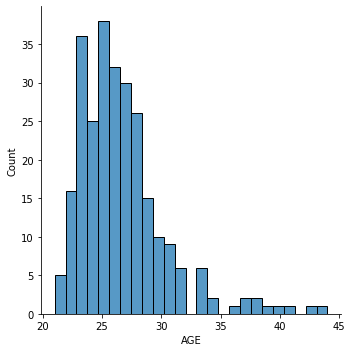

In [35]:
#Distribution of age across players
sns.displot(x = Master_df['AGE'], bins = 25)

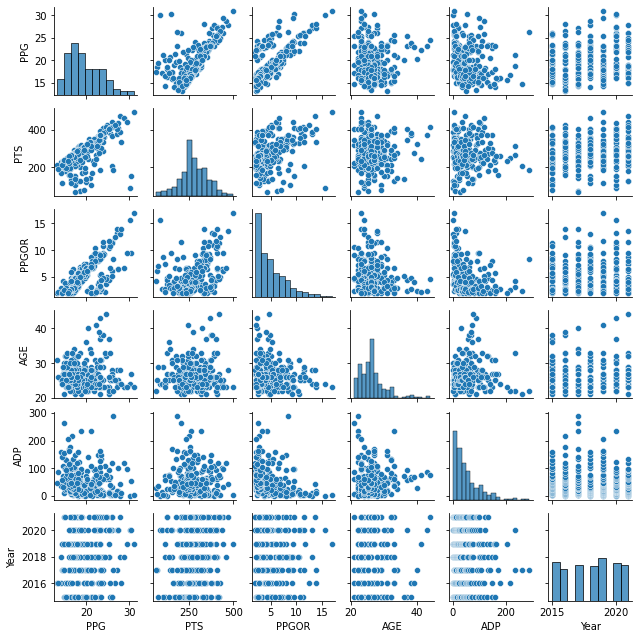

In [51]:
sns.pairplot(Master_df, height=1.5)